# 2010 Population by Neighborhood

Data source: https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Neighborhood-Tabulatio/swpk-hqdp/data

In [126]:
import pandas as pd
import geopandas as gpd
from os.path import join
import os
import matplotlib.pyplot as plt

In [127]:
url = "https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD"

In [128]:
population = pd.read_csv(url)
population_2010 = population[population['Year'] == 2010]

In [130]:
skip_jersey_city = True

if skip_jersey_city == False:
    # Manually add jersey city population?
    # Source: https://www.google.com/publicdata/explore?ds=kf7tgg1uo9ude_&met_y=population&hl=en&dl=en
    JC_df = pd.DataFrame()
    JC_df['Borough'] = ["Jersey City"]
    JC_df['Year'] = [2010]
    JC_df['FIPS County Code'] = [0] # look this up later
    JC_df['NTA Code'] = ["JC"]
    JC_df['NTA Name'] = ["Jersey City"]
    JC_df['Population'] = [163422]

    population_2010 = pd.concat([population_2010, JC_df])

In [131]:
population_2010.reset_index(drop=True, inplace=True)

In [132]:
population_2010.sort_values(by='Population', ascending=False).head(10)

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
95,Manhattan,2010,61,MN12,Upper West Side,132378
138,Queens,2010,81,QN28,Jackson Heights,108152
82,Brooklyn,2010,47,BK88,Borough Park,106357
58,Brooklyn,2010,47,BK42,Flatbush,105804
66,Brooklyn,2010,47,BK61,Crown Heights North,103169
79,Brooklyn,2010,47,BK82,East New York,91958
46,Brooklyn,2010,47,BK28,Bensonhurst West,88727
139,Queens,2010,81,QN29,Elmhurst,88427
114,Manhattan,2010,61,MN36,Washington Heights South,84438
128,Queens,2010,81,QN17,Forest Hills,83728


In [133]:
root = ".."
output_dir = join(root, "data", "population")
# Make data directory
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [134]:
population_2010.to_csv(join(output_dir, "population_2010.csv"))

# Join to neighborhoods and make choropleth map

In [174]:
inputfile = join(root, "data", "neighborhood_tabulation_areas", "nyc_neighborhoods_4326",
                 "nyc_neighborhoods_4326.shp")
neighborhoods = gpd.read_file(inputfile)

In [175]:
population_2010.index = population_2010['NTA Code']

In [176]:
neighborhoods.index = neighborhoods['NTACode']

In [177]:
neighborhoods = neighborhoods.join(population_2010, how='left')

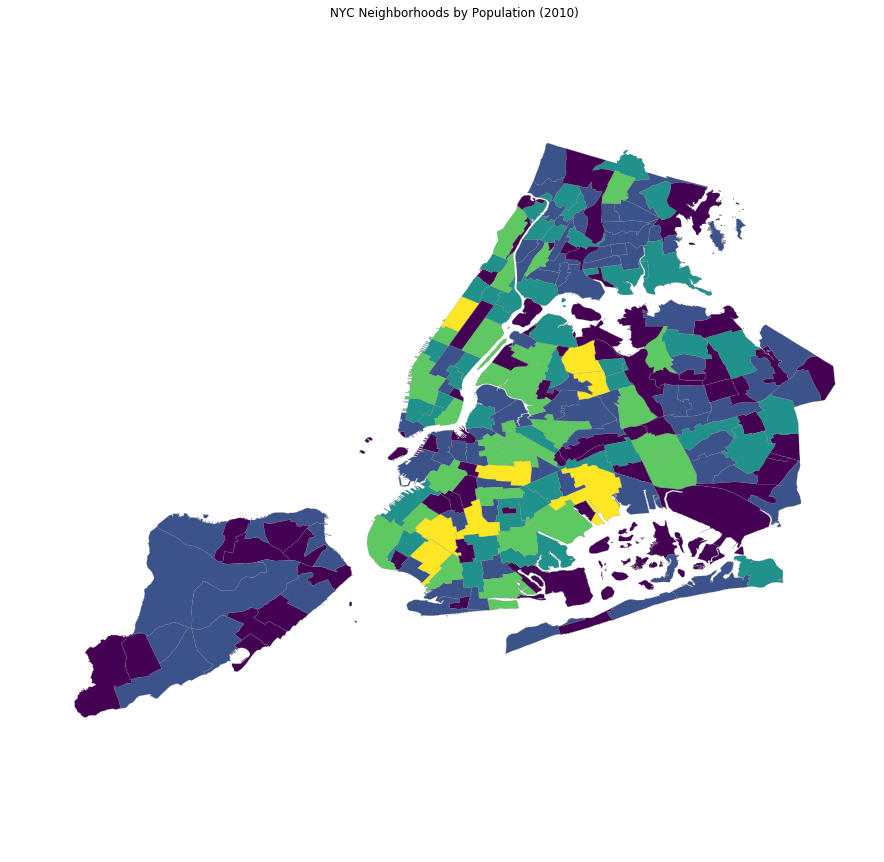

In [179]:
f, ax = plt.subplots(1, figsize=(15,15))
neighborhoods.plot(ax=ax,figsize=(15,15), linewidth=0.2, edgecolor='0.5', scheme="fisher_jenks", column = 'Population')
ax.set_axis_off()
plt.axis('equal')
plt.title("NYC Neighborhoods by Population (2010)")
plt.show()

In [173]:
neighborhoods.crs

{'init': 'epsg:4326'}

In [180]:
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
NTACode,,,,,,,,,,,,,,
BK88,3,Brooklyn,047,BK88,Borough Park,39247.228028,5.400502e+07,POLYGON ((-73.97604935657381 40.63127590564677...,Brooklyn,2010,47,BK88,Borough Park,106357
QN52,4,Queens,081,QN52,East Flushing,25843.364936,2.945438e+07,POLYGON ((-73.79493246233996 40.75779803007455...,Queens,2010,81,QN52,East Flushing,26982
QN48,4,Queens,081,QN48,Auburndale,32446.878673,3.416422e+07,POLYGON ((-73.77573836927098 40.74332564716399...,Queens,2010,81,QN48,Auburndale,19996
QN51,4,Queens,081,QN51,Murray Hill,33266.904811,5.248828e+07,POLYGON ((-73.80379022888246 40.77561011179249...,Queens,2010,81,QN51,Murray Hill,51739
QN27,4,Queens,081,QN27,East Elmhurst,19816.712323,1.972685e+07,"POLYGON ((-73.86109724335759 40.7636644770869,...",Queens,2010,81,QN27,East Elmhurst,23150


In [156]:
root = ".."
neighborhoods[['NTACode', 'NTAName', 'geometry', 'Borough', 'Year', 'Population']].to_file(join(root, "data", "neighborhood_tabulation_areas", "nyc_neighborhoods_population"))